In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/raulrevidiego/Publicidad/refs/heads/main/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [86]:
# Eliminamos del conjunto de datos la primer columna que contiene datos que no son útiles
data = data.iloc[:, 1:]

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


El objetivo del algoritmo que desarrollemos será para encontrar el valor de la columna Sales, por lo que esta variable sera nuestra columna dependiente y las demás son nuestras variables independientes.

Ahora que sabemos eso podemos comenzar a trabajar en cada una de las columnas, lo primero que haremos sera graficar los datos que podemos encontrar en cada una de ellas.

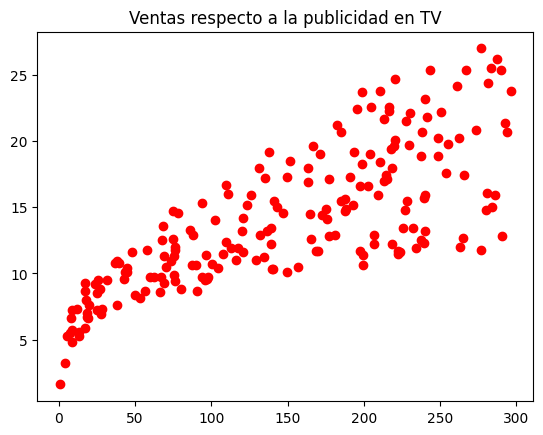

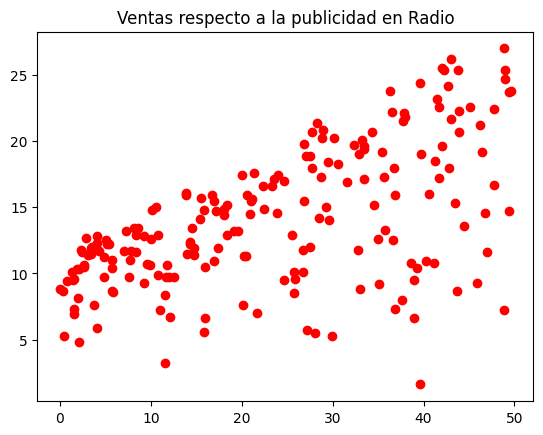

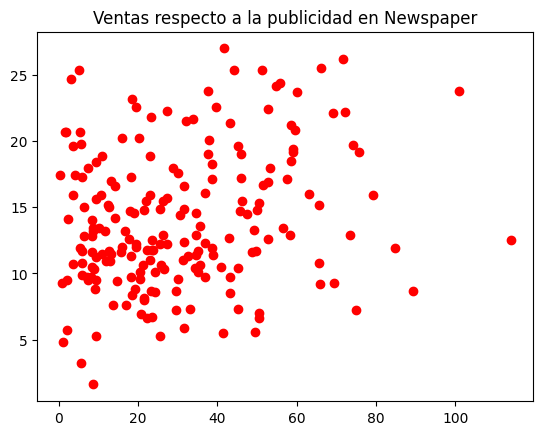

In [88]:
cols = ['TV', 'Radio', 'Newspaper']

for col in cols:
  plt.plot(data[col], data['Sales'], 'ro')
  plt.title('Ventas respecto a la publicidad en %s' % col)
  plt.show()

In [89]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = lin_reg.predict(X_test)
print('Predicciones: {}, valores reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], valores reales: [16.9 22.4 21.4  7.3]


In [92]:
r_squared = lin_reg.score(X_test, y_test) # R^2

mse = mean_squared_error(y_test, y_pred) # MSE
rmse = mse**0.5 # RMSE

print('R-squared:', r_squared)
print('RMSE:', rmse)

R-squared: 0.6766954295627076
RMSE: 3.194472431998898


In [93]:
r2_score(y_test, y_pred)

0.6766954295627076

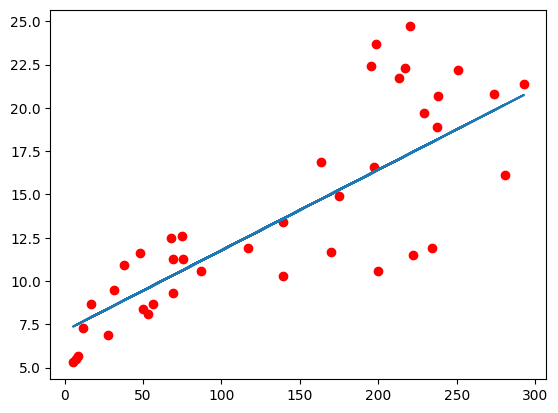

In [94]:
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred.reshape(-1,1))
plt.show()

In [95]:
def modelos_simple(independiente):
  X = data[independiente].values.reshape(-1,1)
  y = data['Sales'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)

  print('Predicciones: {}, valores reales: {}'.format(y_pred[:4], y_test[:4]))

  r_squared = lin_reg.score(X_test, y_test) # R^2
  mse = mean_squared_error(y_test, y_pred) # MSE
  rmse = mse**0.5 # RMSE
  print('R2', r_squared, "RMSE", rmse)

  print('R2', r2_score(y_test, y_pred))

  plt.plot(X_test, y_test, 'ro')
  plt.plot(X_test, y_pred.reshape(-1,1))
  plt.show()

Predicciones: [15.88332197 19.17427219 15.20877938 16.96667826], valores reales: [16.9 22.4 21.4  7.3]
R2 0.2634309396999791 RMSE 4.8216974799471926
R2 0.2634309396999791


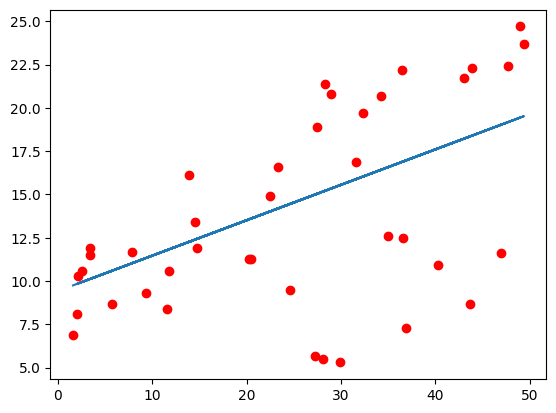

In [96]:
modelos_simple('Radio')

Predicciones: [15.47167765 15.47167765 14.89203768 15.01155108], valores reales: [16.9 22.4 21.4  7.3]
R2 0.029871749149522397 RMSE 5.533600454969853
R2 0.029871749149522397


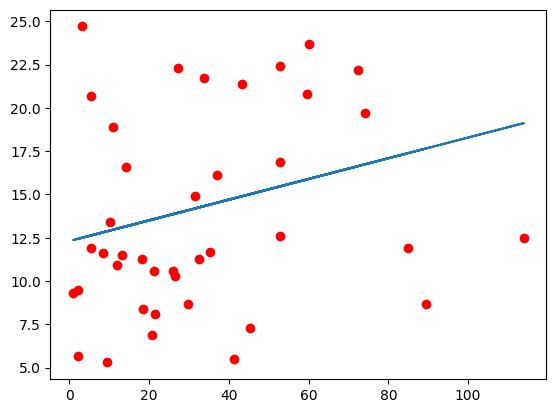

In [97]:
modelos_simple('Newspaper')

In [98]:
X = data.drop(['Radio', 'Sales'], axis=1).values
y = data['Sales'].values


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = lin_reg.predict(X_test)
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [16.00205249 17.4873792  21.45480309  8.555338  ], Reales: [16.9 22.4 21.4  7.3]


In [102]:
mse = mean_squared_error(y_test, y_pred) # MSE
rmse = mse**0.5 # RMSE
print('RMSE:', rmse)
print('R2:', r2_score(y_test, y_pred))

RMSE: 3.3260422878644853
R2: 0.649515280538585


<Axes: >

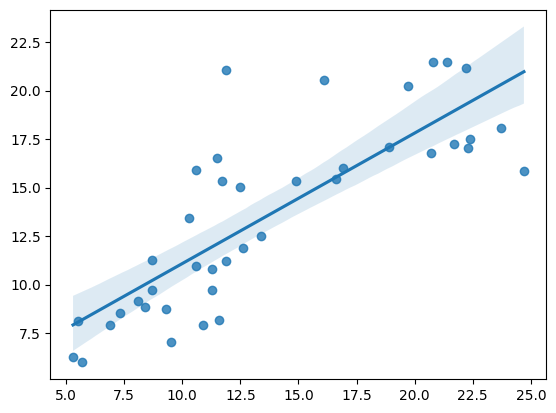

In [103]:
sns.regplot(x = y_test, y = y_pred)

Predicciones: [16.35747252 20.86299397 21.52505848 10.58719845], Reales: [16.9 22.4 21.4  7.3]
RMSE: 1.7714254173033515
R2: 0.9005833101920356


<Axes: >

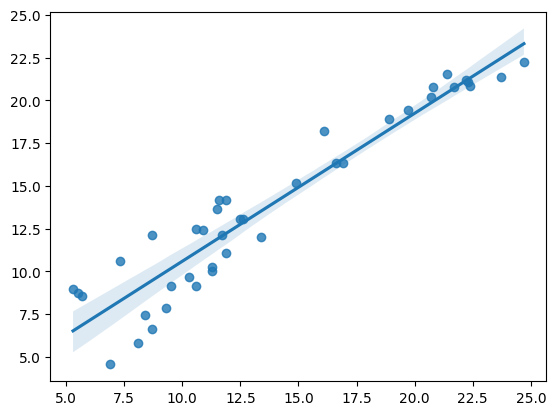

In [104]:
X = data.drop(['Newspaper', 'Sales'], axis=1).values
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

mse = mean_squared_error(y_test, y_pred) # MSE
rmse = mse**0.5 # RMSE
print('RMSE:', rmse)
print('R2:', r2_score(y_test, y_pred))

sns.regplot(x = y_test, y = y_pred)